Running without src modules - basic EDA only
🚀 Climate Discourse EDA - NASA Dataset Analysis
Date: 2026-01-10 10:41
------------------------------------------------------------
✅ Loaded 522 records | 2020-09-15 to 2023-12-25

1. BASIC DATASET OVERVIEW
Shape: (522, 7)
Date range: 2020-09-15 → 2023-12-25

Columns: ['date', 'likesCount', 'profileName', 'commentsCount', 'text', 'engagement', 'text_length']

Missing values:
 date               0
likesCount         0
profileName        0
commentsCount    278
text              18
engagement         0
text_length       18
dtype: int64

Engagement stats:
count    522.000000
mean       8.785441
std       18.142429
min        0.000000
25%        0.000000
50%        2.000000
75%        9.000000
max      192.000000
Name: engagement, dtype: float64

📝 Sample comments:
1. 2022-09-07: Neat comparison I have not heard it before.
 I would say that CO2 is like a disco ball so energy and...
2. 2022-09-08: An excellent way to visualise the invisible! Thank

C:\Users\uvesh\AppData\Local\Temp\ipykernel_18820\3017296484.py:69: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample('M', on='date').agg({


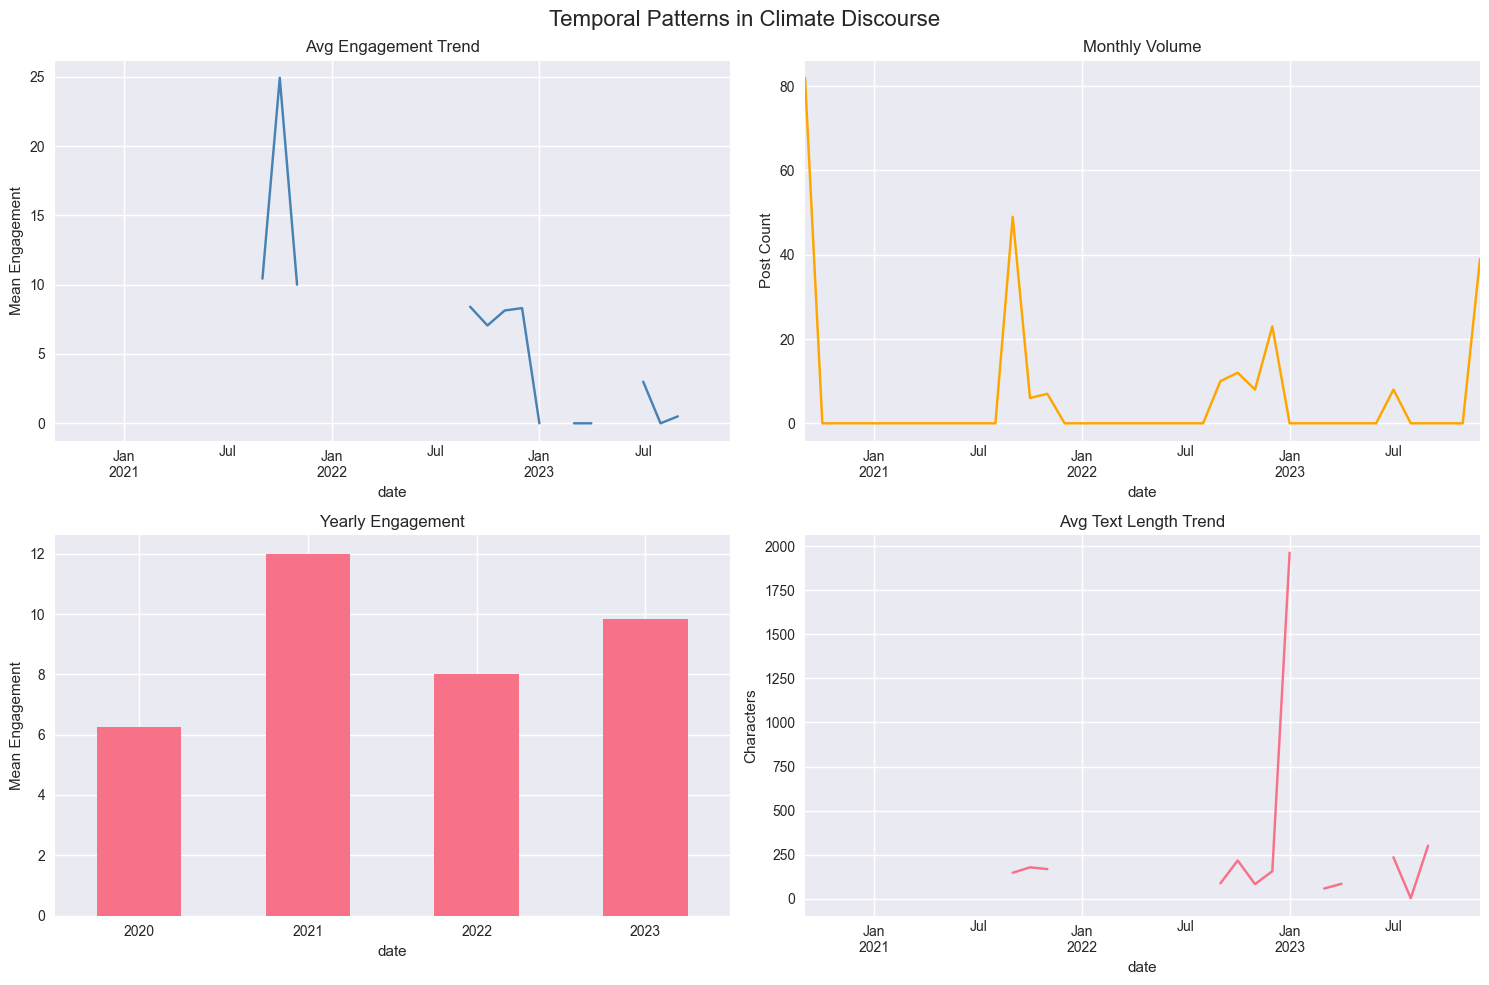

📈 Peak month: 2021-10-31 00:00:00+00:00
                           engagement  likesCount  commentsCount  text_length
date                                                                         
2023-08-31 00:00:00+00:00        0.00        0.00              0         3.00
2023-09-30 00:00:00+00:00        0.50        0.50              0       301.00
2023-10-31 00:00:00+00:00         NaN         NaN              0          NaN
2023-11-30 00:00:00+00:00         NaN         NaN              0          NaN
2023-12-31 00:00:00+00:00       15.32        6.79             39       149.27

3. TEXT ANALYSIS


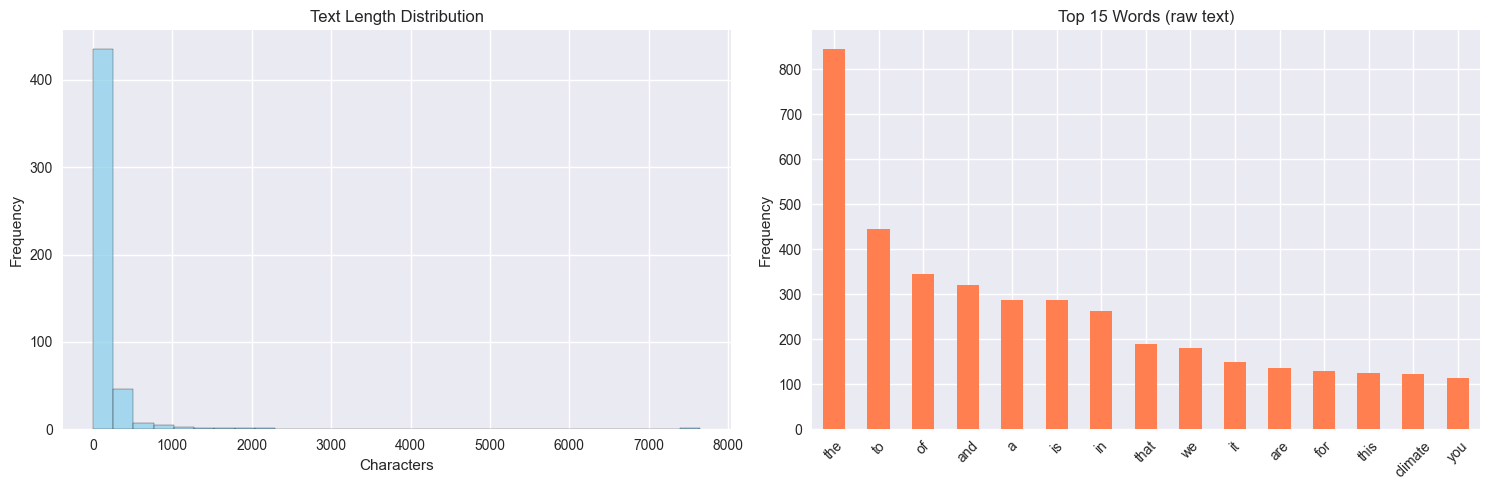

Top words: {'the': 844, 'to': 445, 'of': 344, 'and': 321, 'a': 287}

4. ENGAGEMENT ANALYSIS
🔥 TOP 10 MOST ENGAGING POSTS:

2021-11-01 | Engagement: 192 | Likes: 120
   Length: 867 chars | You are being gas-lighted. Have any of you heard at any time how the science of global temperature is measured. Probably...

2022-12-22 | Engagement: 140 | Likes: 126
   Length: 99 chars | I can only hope to someday attain the level of patience the person running NASA’s social media has....

2021-10-31 | Engagement: 114 | Likes: 62
   Length: 174 chars | Too bad we don’t see Oct 1821 or 1721, just keep going back and you will find the medieval warming period peak as high a...

2021-09-22 | Engagement: 113 | Likes: 110
   Length: 75 chars | I love watch NASA dunk on people who think they can "debunk" climate change...

2021-09-23 | Engagement: 99 | Likes: 37
   Length: 370 chars | Blah blah blah. There is nothing man can do to stop this or create this. Remember when scientists said the next ice age ...

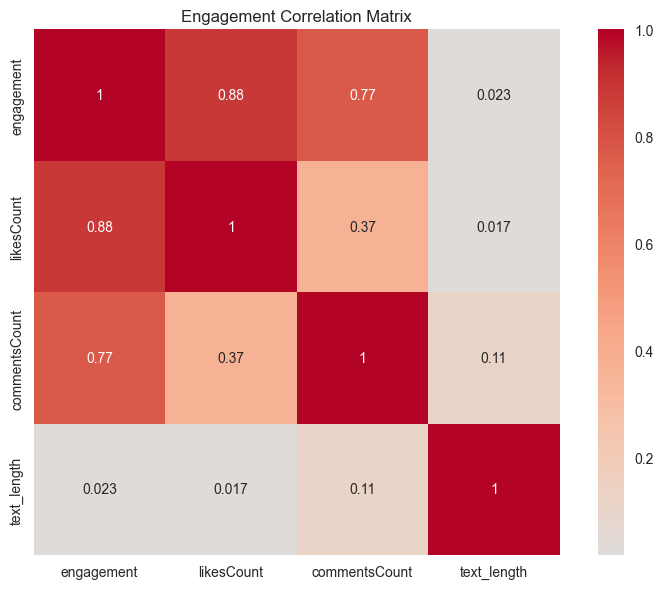


5. SEASONAL PATTERNS


C:\Users\uvesh\AppData\Local\Temp\ipykernel_18820\3017296484.py:165: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_stats = df.groupby('season').agg({


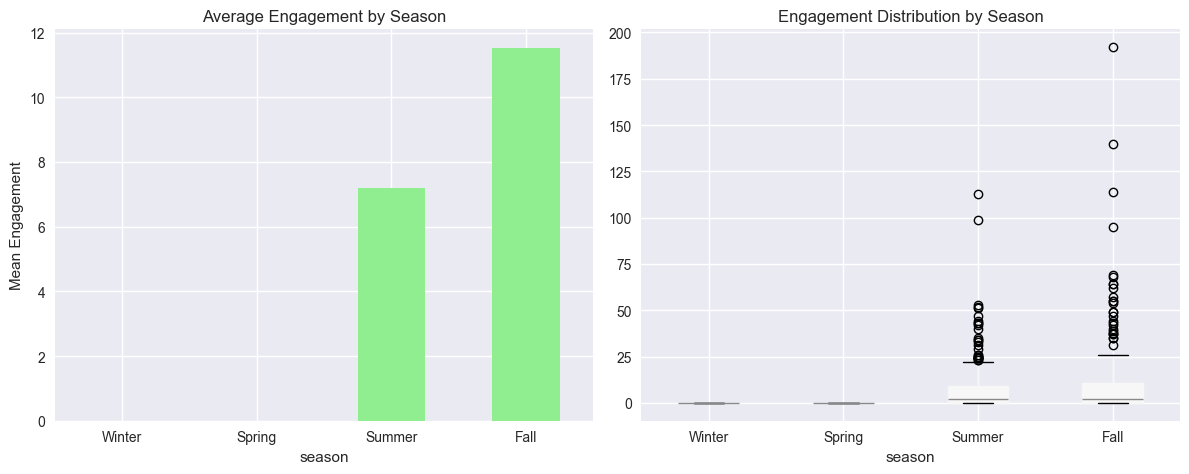

Seasonal stats:
        engagement       text_length
             mean count        mean
season                             
Winter       0.00     9     1750.78
Spring       0.00     1       85.00
Summer       7.19   303      154.24
Fall        11.52   209      161.14

6. SENTIMENT PREVIEW (Top 20 posts)
ℹ️ Install transformers for sentiment analysis:
pip install transformers torch

✅ EDA COMPLETE | Check PNG files for visualizations
📁 Next: python run_analysis.py for full pipeline


In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Climate Discourse EDA - Interactive Analysis Script
NASA climate comments (522 records, 2020-2023)
Run: python exploratory_analysis.py
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np
from collections import Counter
from datetime import datetime
import re

# Optional: Import src modules if available
try:
    from src.data_loader import load_data
    from src.preprocessor import preprocess_df
    from src.sentiment_analyzer import SentimentAnalyzer
    HAS_SRC = True
except ImportError:
    HAS_SRC = False
    print("Running without src modules - basic EDA only")

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

def load_dataset():
    """Load climate_nasa.csv from data/raw/ or current directory"""
    csv_path = Path("../data/raw/climate_nasa.csv")
    if not csv_path.exists():
        csv_path = Path("climate_nasa.csv")
    
    if not csv_path.exists():
        raise FileNotFoundError("climate_nasa.csv not found. Place in data/raw/ or current dir")
    
    df = pd.read_csv(csv_path, parse_dates=['date'])
    df['date'] = pd.to_datetime(df['date'])
    df['engagement'] = df['likesCount'].fillna(0) + df['commentsCount'].fillna(0)
    df['text_length'] = df['text'].str.len()
    print(f"✅ Loaded {len(df)} records | {df['date'].min().date()} to {df['date'].max().date()}")
    return df

def basic_overview(df):
    """Dataset statistics and sample inspection"""
    print("\n" + "="*60)
    print("1. BASIC DATASET OVERVIEW")
    print("="*60)
    
    print(f"Shape: {df.shape}")
    print(f"Date range: {df['date'].min().date()} → {df['date'].max().date()}")
    print("\nColumns:", df.columns.tolist())
    print("\nMissing values:\n", df.isnull().sum())
    print(f"\nEngagement stats:\n{df['engagement'].describe()}")
    
    print("\n📝 Sample comments:")
    for i, (date, text) in enumerate(df[['date', 'text']].head(3).itertuples(index=False)):
        print(f"{i+1}. {date.date()}: {text[:100]}...")

def temporal_analysis(df):
    """Monthly trends and volume patterns"""
    print("\n" + "="*60)
    print("2. TEMPORAL TRENDS (2020-2023)")
    print("="*60)
    
    monthly = df.resample('M', on='date').agg({
        'engagement': 'mean',
        'likesCount': 'mean',
        'commentsCount': 'count',
        'text_length': 'mean'
    }).round(2)
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Temporal Patterns in Climate Discourse', fontsize=16)
    
    monthly['engagement'].plot(ax=axes[0,0], title='Avg Engagement Trend', color='steelblue')
    axes[0,0].set_ylabel('Mean Engagement')
    
    monthly['commentsCount'].plot(ax=axes[0,1], title='Monthly Volume', color='orange')
    axes[0,1].set_ylabel('Post Count')
    
    df.groupby(df['date'].dt.year)['engagement'].mean().plot(
        kind='bar', ax=axes[1,0], title='Yearly Engagement')
    axes[1,0].set_ylabel('Mean Engagement')
    axes[1,0].tick_params(axis='x', rotation=0)
    
    monthly['text_length'].plot(ax=axes[1,1], title='Avg Text Length Trend')
    axes[1,1].set_ylabel('Characters')
    
    plt.tight_layout()
    plt.savefig('eda_temporal.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"📈 Peak month: {monthly['engagement'].idxmax()}")
    print(monthly.tail())

def text_analysis(df):
    """Text length and word frequency"""
    print("\n" + "="*60)
    print("3. TEXT ANALYSIS")
    print("="*60)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Text length distribution
    axes[0].hist(df['text_length'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0].set_title('Text Length Distribution')
    axes[0].set_xlabel('Characters')
    axes[0].set_ylabel('Frequency')
    
    # Top words
    all_text = ' '.join(df['text'].dropna().str.lower())
    words = re.sub(r'[^a-z\s]', '', all_text).split()
    word_counts = Counter(words)
    common_words = pd.Series(word_counts).sort_values(ascending=False).head(15)
    
    common_words.plot(kind='bar', ax=axes[1], color='coral')
    axes[1].set_title('Top 15 Words (raw text)')
    axes[1].set_ylabel('Frequency')
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.savefig('eda_text_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("Top words:", common_words.head().to_dict())

def engagement_analysis(df):
    """Top posts and engagement drivers"""
    print("\n" + "="*60)
    print("4. ENGAGEMENT ANALYSIS")
    print("="*60)
    
    # Top engaging posts
    top_posts = df.nlargest(10, 'engagement')[['date', 'text', 'engagement', 'likesCount', 'text_length']]
    
    print("🔥 TOP 10 MOST ENGAGING POSTS:")
    for idx, row in top_posts.iterrows():
        print(f"\n{row['date'].date()} | Engagement: {row['engagement']:.0f} | Likes: {row['likesCount']}")
        print(f"   Length: {row['text_length']:.0f} chars | {row['text'][:120]}...")
    
    # Engagement correlation matrix
    corr_data = df[['engagement', 'likesCount', 'commentsCount', 'text_length']].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_data, annot=True, cmap='coolwarm', center=0, square=True)
    plt.title('Engagement Correlation Matrix')
    plt.tight_layout()
    plt.savefig('eda_correlation.png', dpi=300, bbox_inches='tight')
    plt.show()

def seasonal_patterns(df):
    """Seasonal engagement patterns"""
    print("\n" + "="*60)
    print("5. SEASONAL PATTERNS")
    print("="*60)
    
    df['month'] = df['date'].dt.month
    df['season'] = pd.cut(df['month'], 
                         bins=[0,3,6,9,12], 
                         labels=['Winter','Spring','Summer','Fall'])
    
    seasonal_stats = df.groupby('season').agg({
        'engagement': ['mean', 'count'],
        'text_length': 'mean'
    }).round(2)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    seasonal_stats['engagement']['mean'].plot(kind='bar', ax=axes[0], color='lightgreen')
    axes[0].set_title('Average Engagement by Season')
    axes[0].set_ylabel('Mean Engagement')
    axes[0].tick_params(axis='x', rotation=0)
    
    df.boxplot(column='engagement', by='season', ax=axes[1], patch_artist=True)
    axes[1].set_title('Engagement Distribution by Season')
    
    plt.suptitle('')
    plt.tight_layout()
    plt.savefig('eda_seasonal.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("Seasonal stats:\n", seasonal_stats)

def sentiment_preview(df):
    """Quick sentiment analysis on top posts (if transformers available)"""
    print("\n" + "="*60)
    print("6. SENTIMENT PREVIEW (Top 20 posts)")
    print("="*60)
    
    if HAS_SRC and SentimentAnalyzer:
        try:
            analyzer = SentimentAnalyzer()
            sample = df.nlargest(20, 'engagement')
            results = analyzer.analyze_batch(sample['text'].tolist())
            
            sample = sample.copy()
            sample['sentiment_label'] = [r['label'] for r in results]
            sample['sentiment_score'] = [analyzer.get_sentiment_score(r) for r in results]
            
            print(sample[['date', 'sentiment_label', 'sentiment_score', 'engagement']].head())
            print(f"\nSentiment-Engagement correlation: {sample['sentiment_score'].corr(sample['engagement']):.3f}")
            
            # Sentiment vs engagement scatter
            plt.figure(figsize=(8, 6))
            plt.scatter(sample['sentiment_score'], sample['engagement'], alpha=0.6)
            plt.xlabel('Sentiment Score')
            plt.ylabel('Engagement')
            plt.title('Sentiment vs Engagement (Top 20)')
            plt.savefig('eda_sentiment.png', dpi=300, bbox_inches='tight')
            plt.show()
            
        except Exception as e:
            print(f"Sentiment analysis unavailable: {e}")
    else:
        print("ℹ️ Install transformers for sentiment analysis:")
        print("pip install transformers torch")

def main():
    """Run complete EDA pipeline"""
    print("🚀 Climate Discourse EDA - NASA Dataset Analysis")
    print(f"Date: {datetime.now().strftime('%Y-%m-%d %H:%M')}")
    print("-" * 60)
    
    # Load data
    df = load_dataset()
    
    # Run all analyses
    basic_overview(df)
    temporal_analysis(df)
    text_analysis(df)
    engagement_analysis(df)
    seasonal_patterns(df)
    sentiment_preview(df)
    
    print("\n" + "="*60)
    print("✅ EDA COMPLETE | Check PNG files for visualizations")
    print("📁 Next: python run_analysis.py for full pipeline")
    print("="*60)

if __name__ == "__main__":
    main()
